In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import os
import random

In [5]:
#read blast clust fasta file

path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\blastclust_files\blastclust_t2t_col_unique_cen180.Fasta"
text_file = open(path, "r")

#get accession name
accession = os.path.basename(path)
accession = accession.replace("blastclust__","") #clean file name to get what accession it is
accession = accession.replace("blastclust_","")
accession = accession.replace("nondef","")
accession = accession.replace("_unique_cen180.Fasta","")

#split text file by new line and create list
lines = text_file.read().split('\n')

#separate repeats within the list by whitespace
separated = []
for i in lines:
    sep = i.split()
    separated.append(sep)

In [14]:
noclusters = len(separated) #count number of clusters
#count number of repeats in each cluster
norep = []
for i in separated:
    rep = len(i)
    norep.append(rep)
print(noclusters)#shows number of clusters
print(norep) #shows number of sequences in each cluster

10575
[20014, 16, 16, 13, 12, 11, 11, 10, 9, 9, 9, 7, 7, 7, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

c:\users\christie and victori\pycharmprojects\satellite_research_project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of repeats in each cluster for t2t_col')

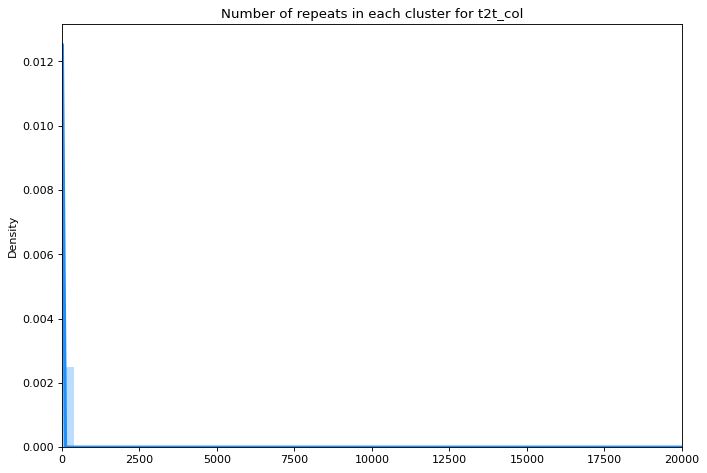

In [15]:
plt.pyplot.figure(figsize=(10,7), dpi= 80) #change size of plot

x = norep
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':3}) # alpha changes opacity of bars, kde plots line on graph
sns.distplot(x, color="dodgerblue", label="Compact", **kwargs) 
plt.pyplot.xlim(0,20000)
plt.pyplot.title("Number of repeats in each cluster for "+accession)
#plt.pyplot.savefig(r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\histograms\clustergraph_"+accession+"".png")

In [ ]:
clustfast = []
for i in separated:
    if len(i) > 5: #if cluster has more than 5 sequences
        choice = random.choices(i, k=2) #randomly pick 2 items from list
    elif len(i) > 1: #else if cluster has more than 1 sequence
        choice = random.choices(i, k=1)
    else:
        choice = i
    clustfast.append(choice)

clustfast = [item for sublist in clustfast for item in sublist] #flatten list (make list of lists into one big list)
#clustfast

In [ ]:
#for general
path2 = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\drive-download-20211014T102922Z-001\all.repeats.from."+accession+".csv"

#for t2t
#path2 = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\drive-download-20211014T102922Z-001\all.repeats.from.t2t-col.csv"

df = pd.read_csv(path2)
df["names"] = df["fasta.name"].str.cat(df["start"].astype("str"), sep ="_") 
# concatenate strings in fasta.name and start column to make names file; make sure variables are strings
df["names"] = accession+"_"+ df["names"]

#subsetting repeats into cen180 and cen160
cen180 = df[df["length"].between(175, 180)]

In [ ]:
clustdf = cen180[cen180.names.isin(clustfast)] #filter dataset to only those we want from clustering!
clustdf["names"] = "cen180_" + clustdf["names"]
wantdf = clustdf.drop_duplicates(subset = ["sequence"])
#clustdf
#wantdf

In [ ]:
uniq_fasta = open(r"nondefblastclust_"+accession+"_uniquecen180.Fasta","w+") #open fasta file, "w+" means you intend to write in it
empty_uniq_fasta = [] #empty list to compile all rows
for j in range(len(wantdf)): #do for all rows
    string_uniq = wantdf.iloc[j,4]
    n=60
    split_uniq = [string_uniq[i:i+n] for i in range(0, len(string_uniq), n)] #splits sequence string into length 60
    join_uniq = "\n".join(split_uniq) #joins string with new lines
    write_fasta_uniq = ">"+wantdf.iloc[j,8]+"\n"+join_uniq #create fasta format
    empty_uniq_fasta.append(write_fasta_uniq) #append row's fasta to list
joined_fasta_uniq = "\n".join(empty_uniq_fasta) #join strings in list into one big string with new line breaks
uniq_fasta.write(joined_fasta_uniq) #enter list into fasta file
uniq_fasta.close() #close fasta file